
# Diseño de software

----

## SOLID

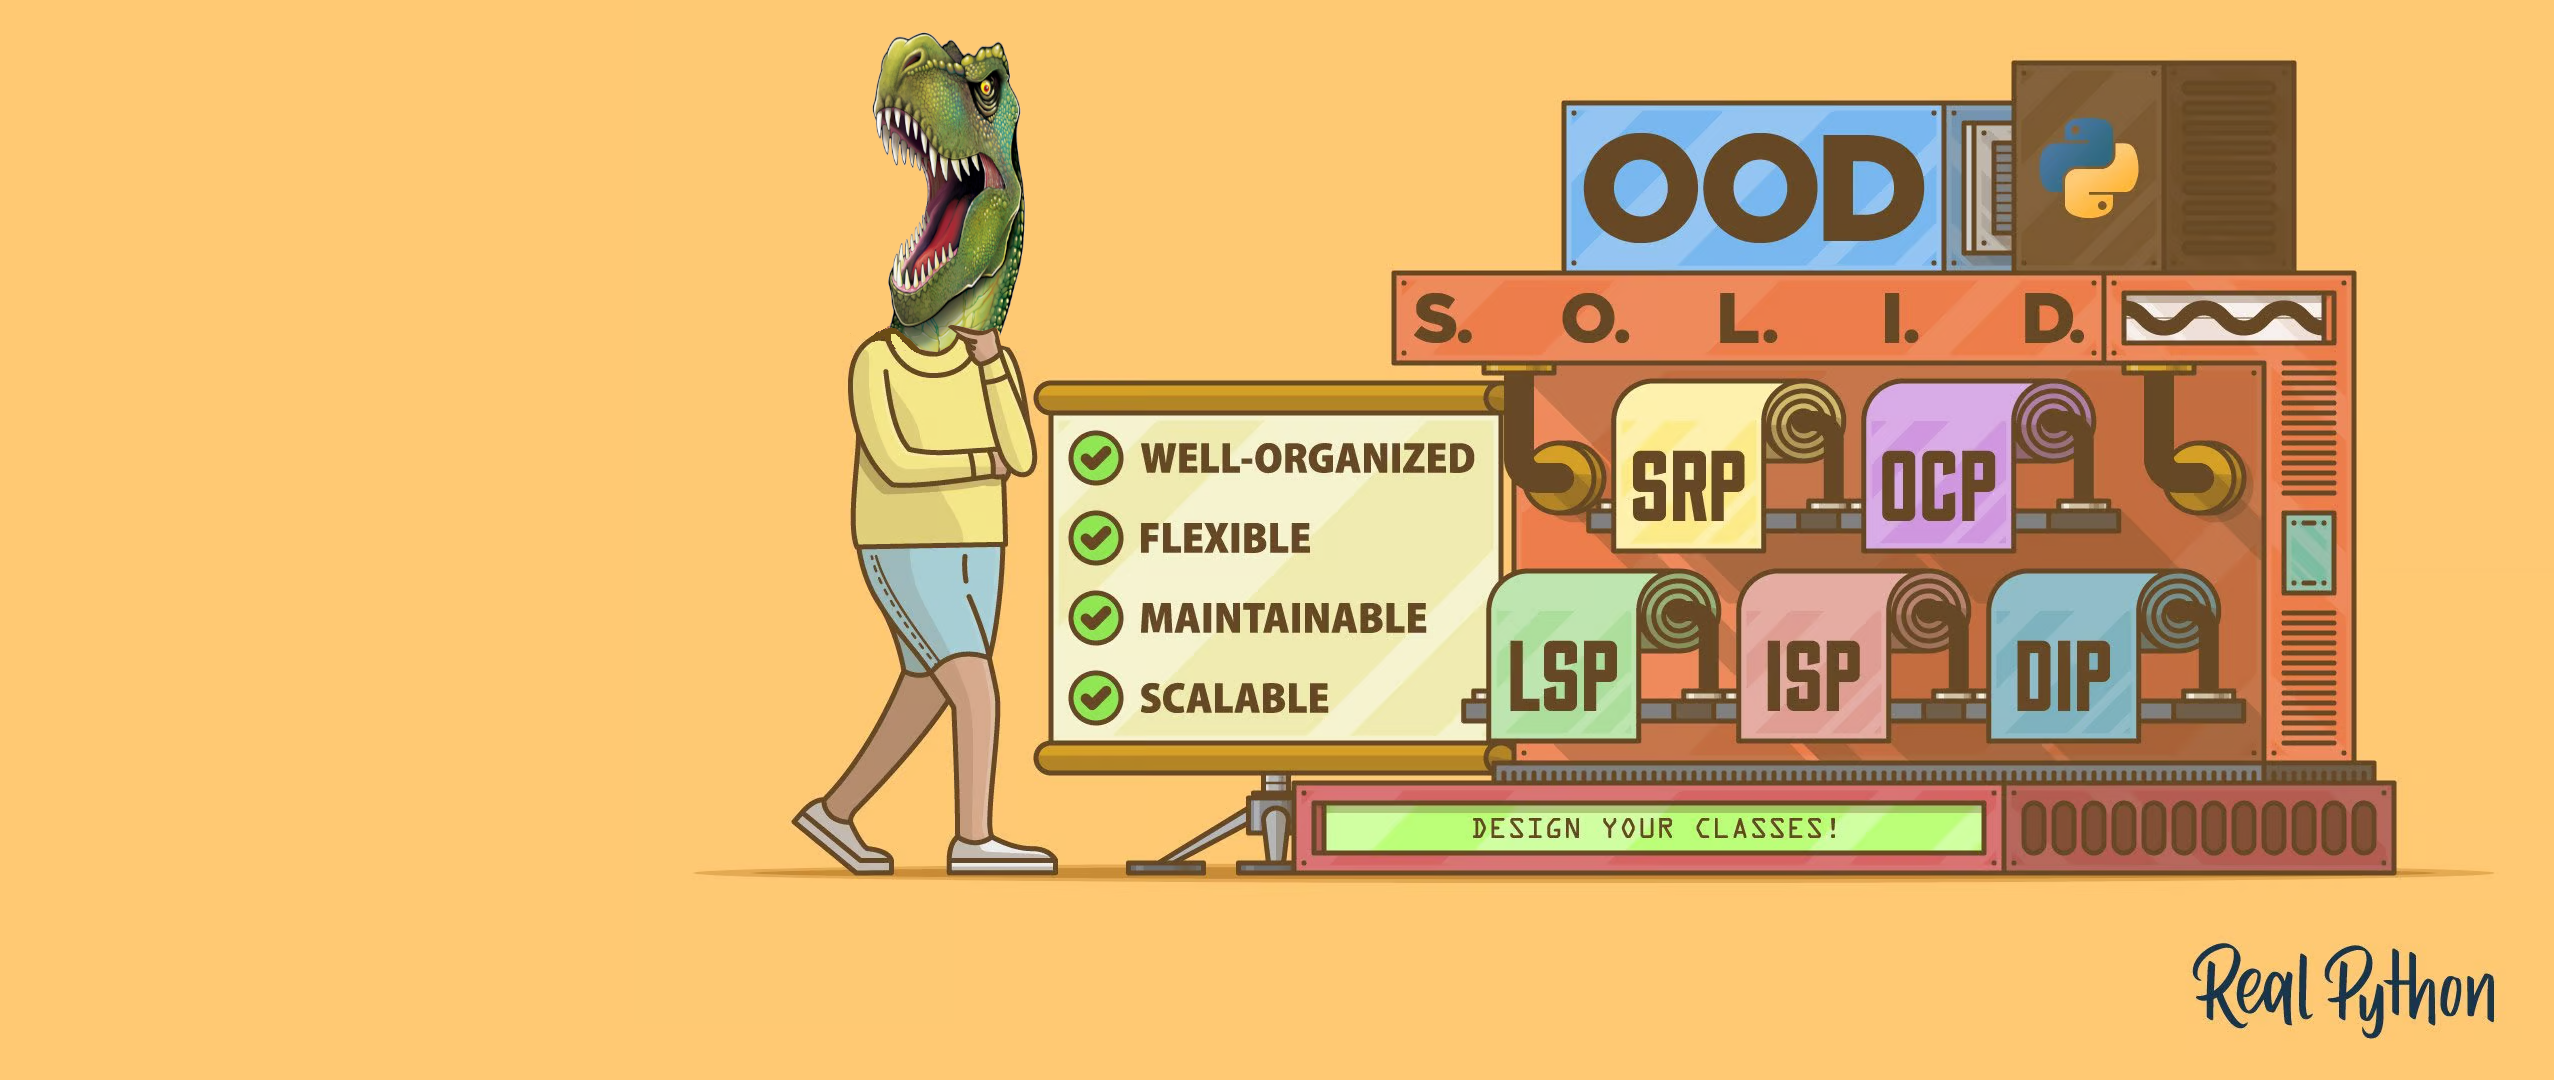

Casi todo sacado de aca: https://realpython.com/solid-principles-python/


## Qué es SOLID?

- Es un conjunto de cinco principios de diseño de software que ayudan a crear código más claro, mantenible y escalable. 
- Fueron introducidos por el autor y consultor de software *Robert C. Martin* (Uncle Bob) y se utilizan ampliamente en la programación orientada a objetos. 

- No son reglas estrictas, sino más bien conceptos guía.
- Sirven como marcos mentales para categorizar el código bueno y malo, ayudando a los desarrolladores a razonar sobre las decisiones de diseño.
- Ofrecen soluciones de sentido común a problemas comunes y ayudan a evitar problemas en diseño de software.


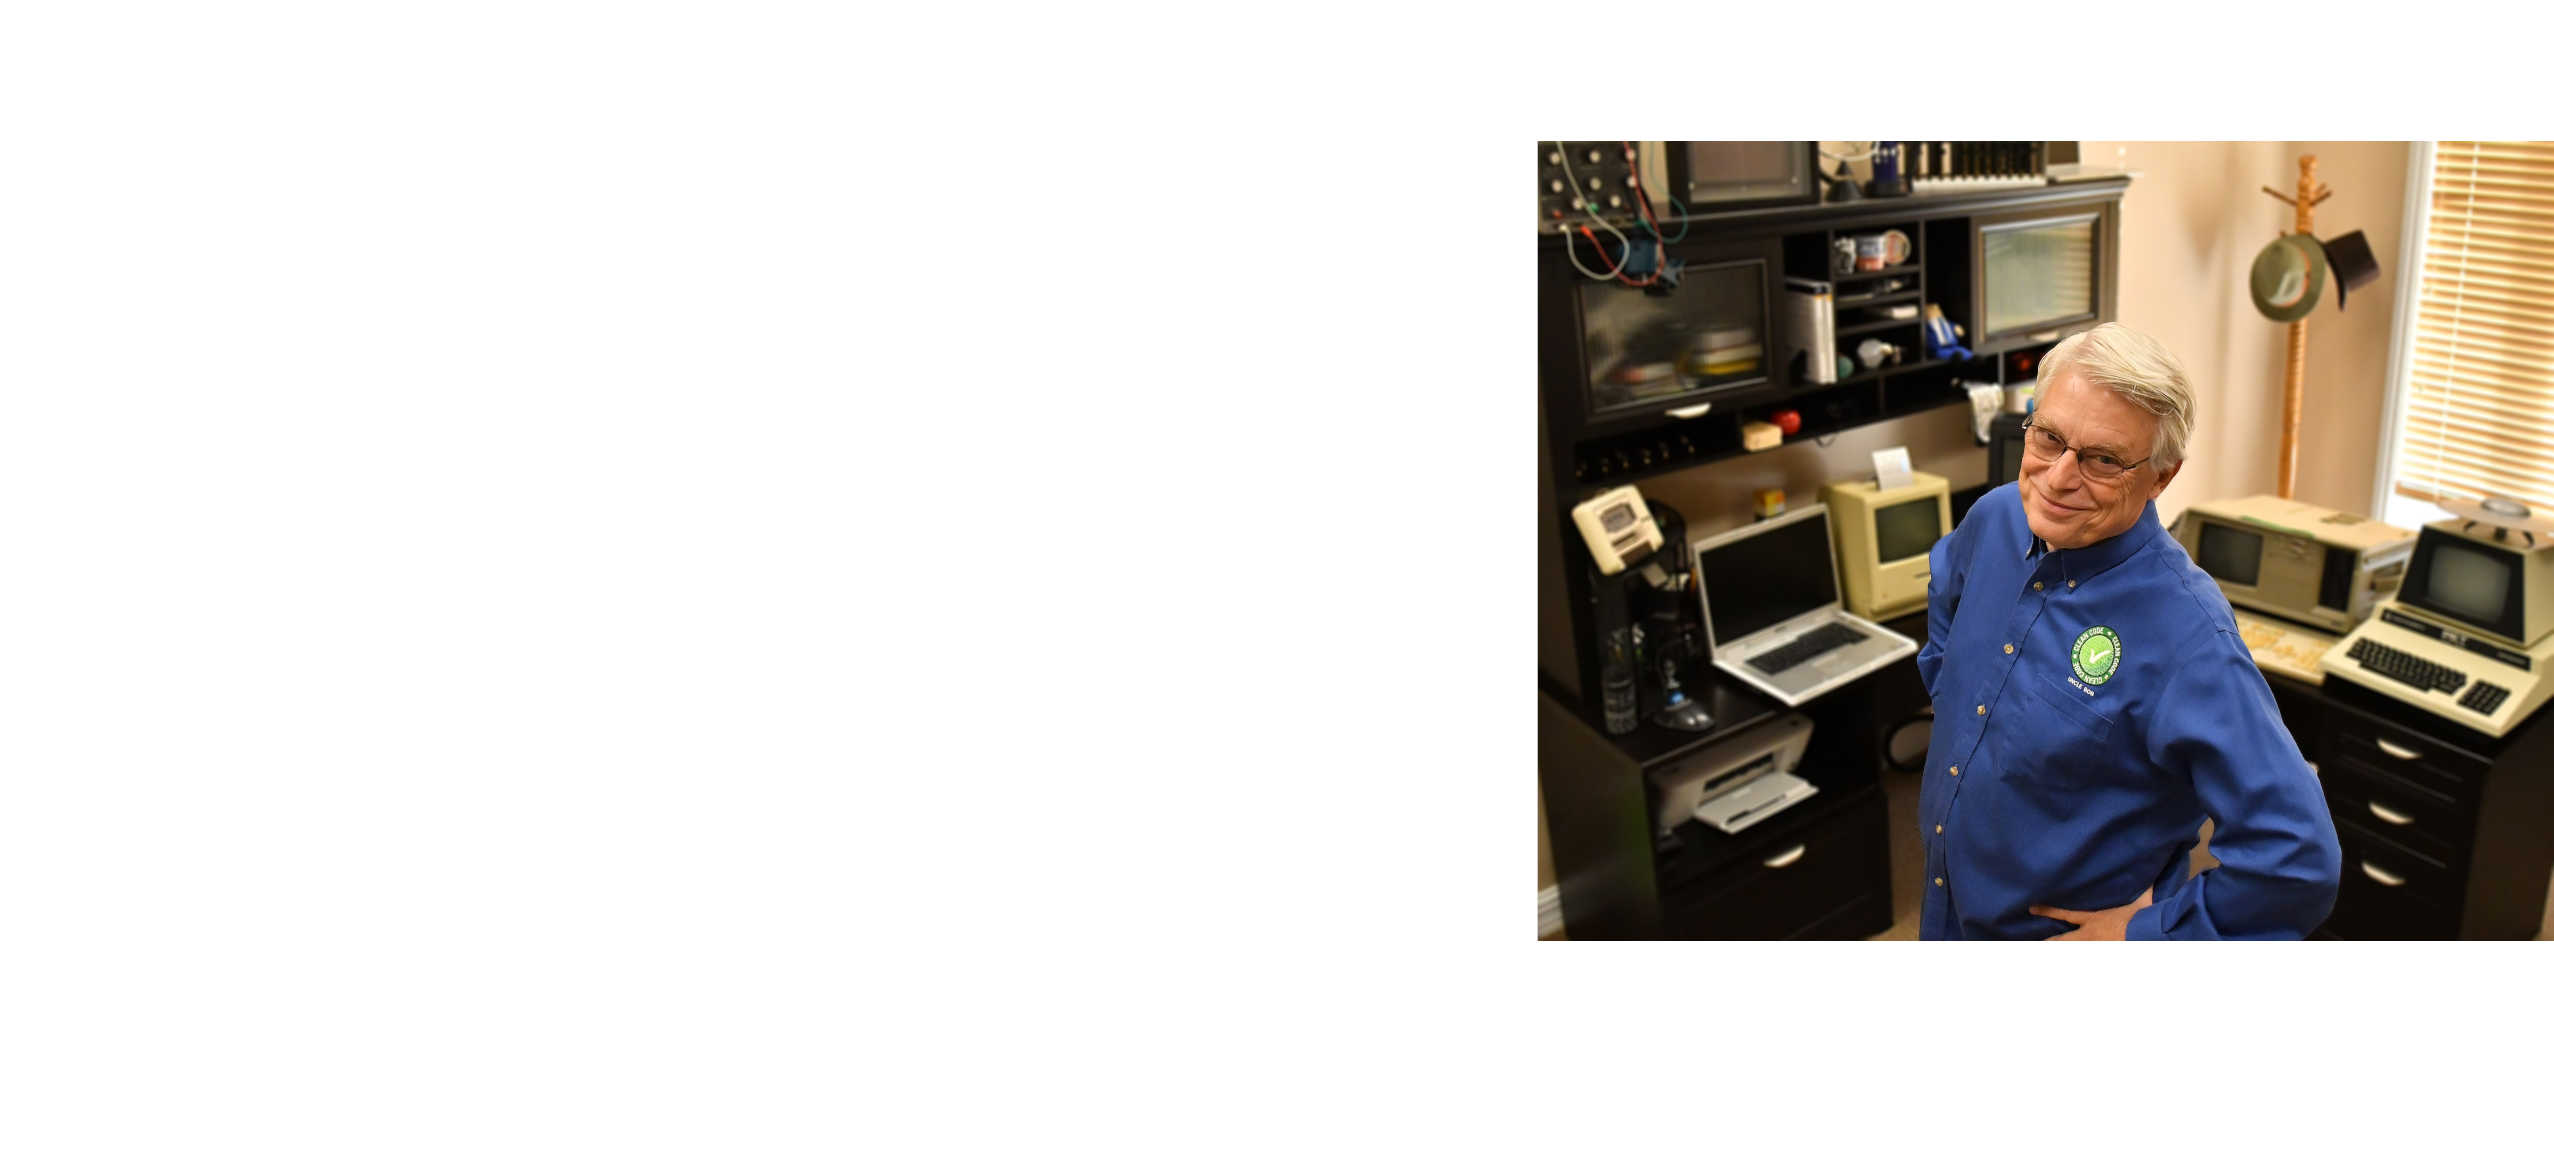

## Qué es SOLID?

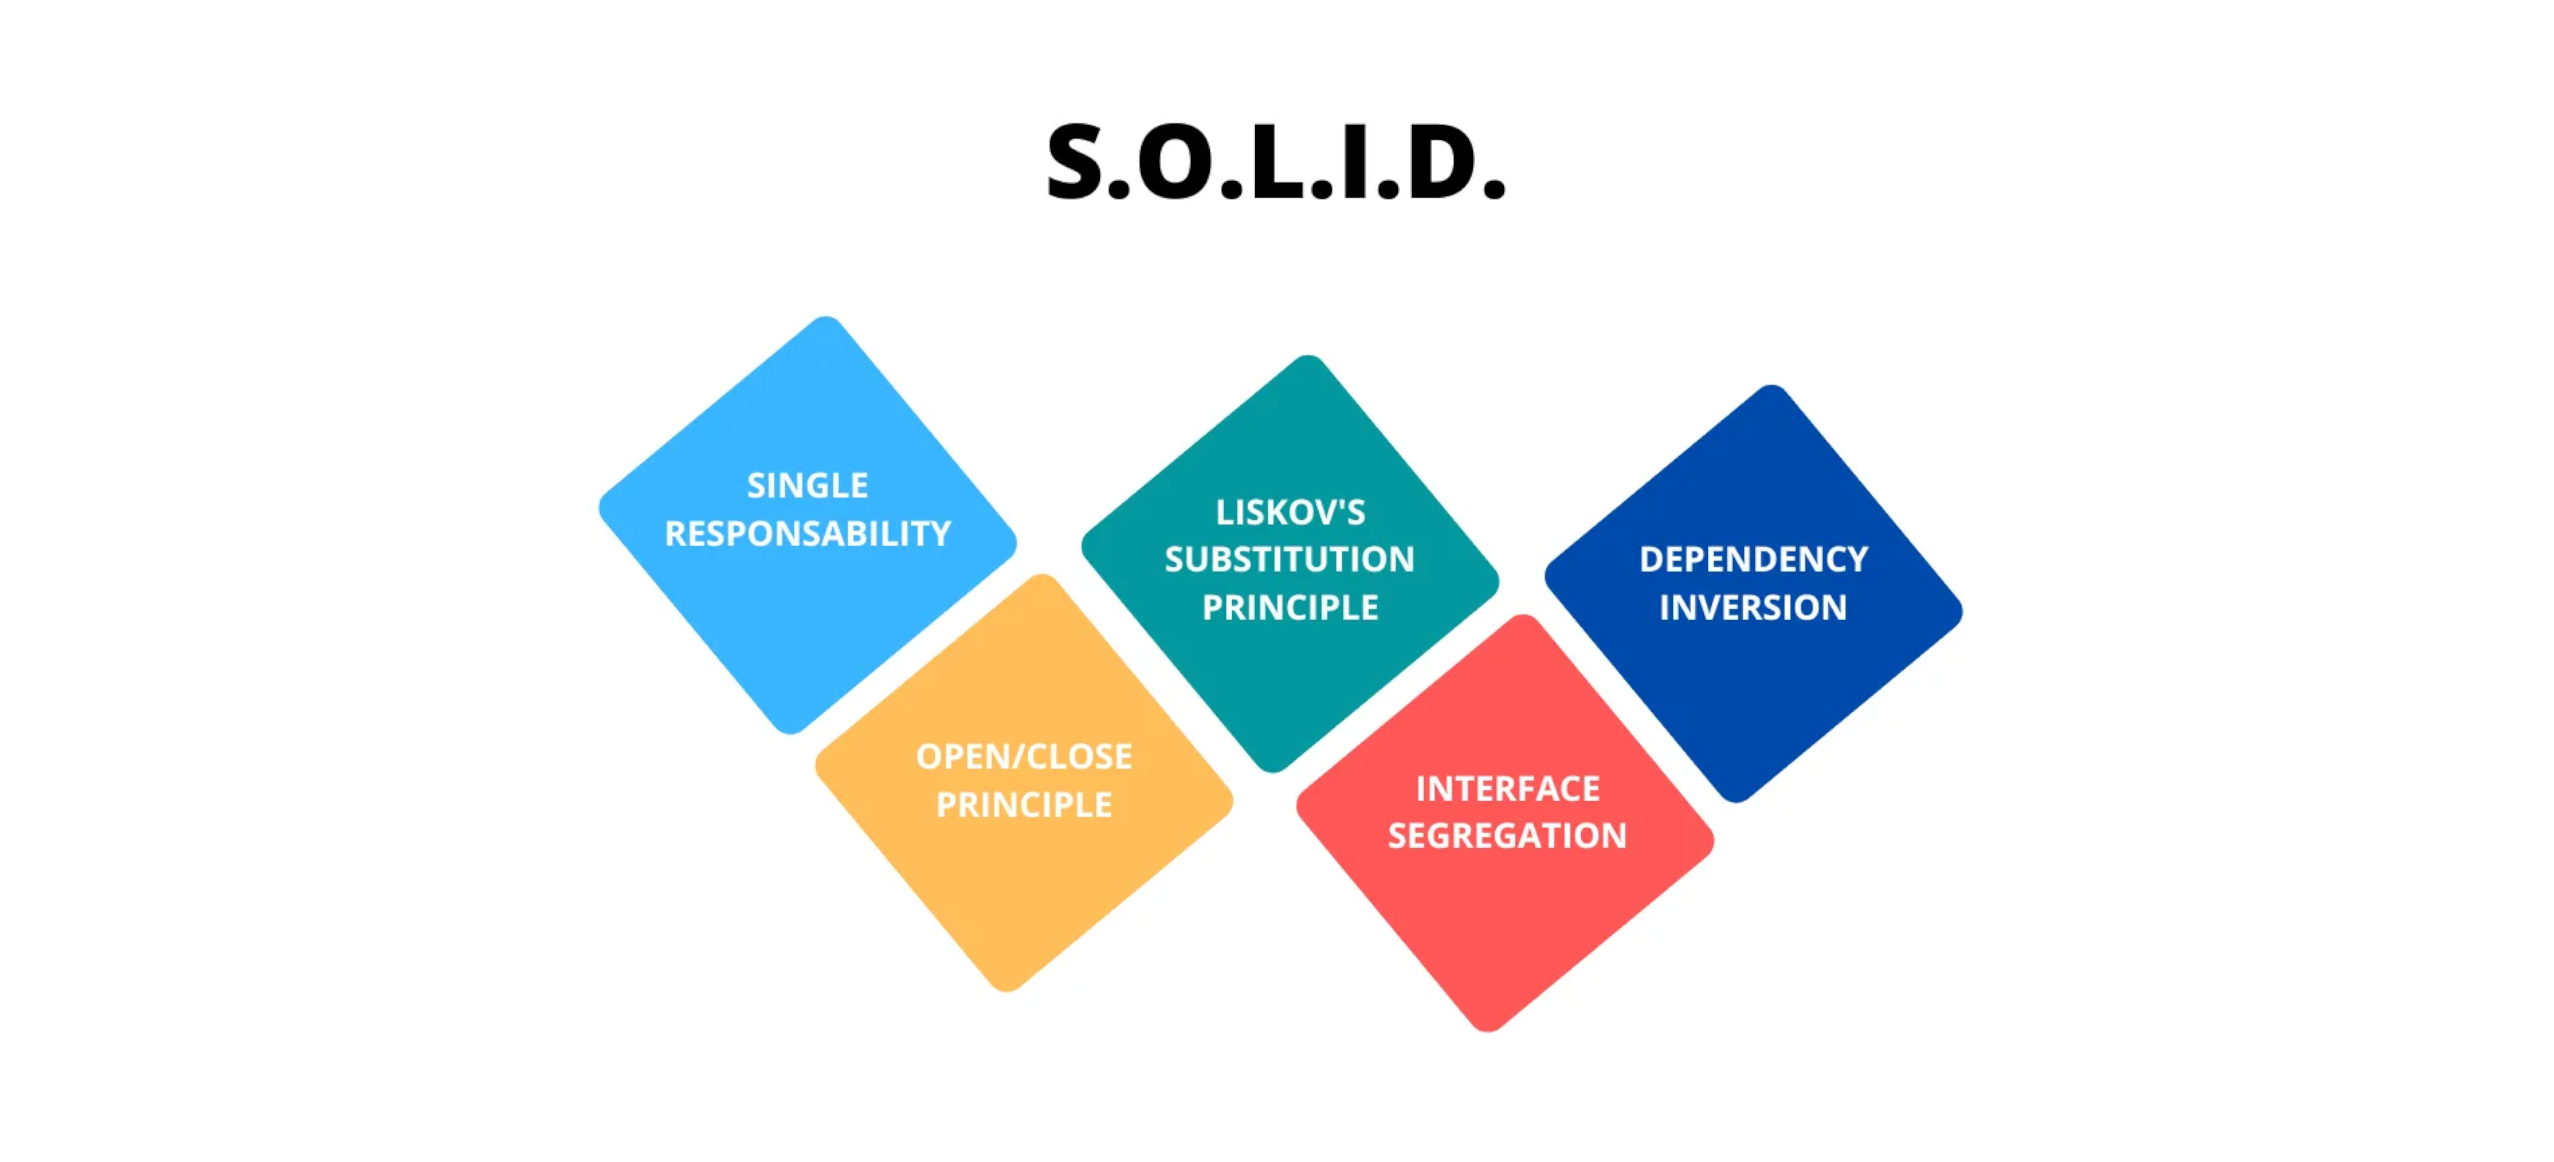

> Los principios SOLID expresados de varias maneras en distintos lugares. En general en estas slides se refiere a ellos siguiendo la redacción que utiliza el Tío Bob en su libro [Desarrollo Ágil de Software](https://www.amazon.com/dp/0131857258/?tag=devdetailpage02-20). 

> Formulaciones alternativas en un resumen rápido de estos y otros principios relacionados, se en cuentran en [Los Principios de OOD](http://butunclebob.com/ArticleS.UncleBob.PrinciplesOfOod) y su [blog personal](https://blog.cleancoder.com/uncle-bob/2020/10/18/Solid-Relevance.html)"

## Por que SOLID importa?

> Esencialmente, el desafío detrás de la aplicación de cada principio y técnica de diseño es manejar la complejidad a largo plazo.

> A medida que pasa el tiempo, los requisitos cambian y se acumal, y es crucial contener la entropía.

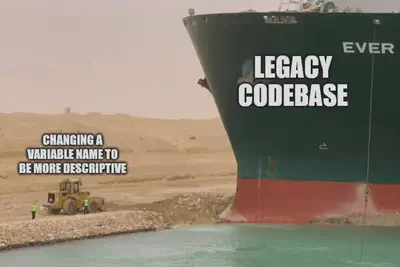

## `SRP` - The Single Responsibility Principle.

> Reúne las cosas que cambian por las mismas razones. (y) Separa las cosas que cambian por razones diferentes
>
> *Versión moderna:* "Una clase debería tener solo una razón para cambiar."

- Este principio está estrechamente relacionado con [Separation of concerns](https://en.wikipedia.org/wiki/Separation_of_concerns).
- Se debe dividir los programas en diferentes seccionesy Cada sección debe abordar una "preocupación" separada.

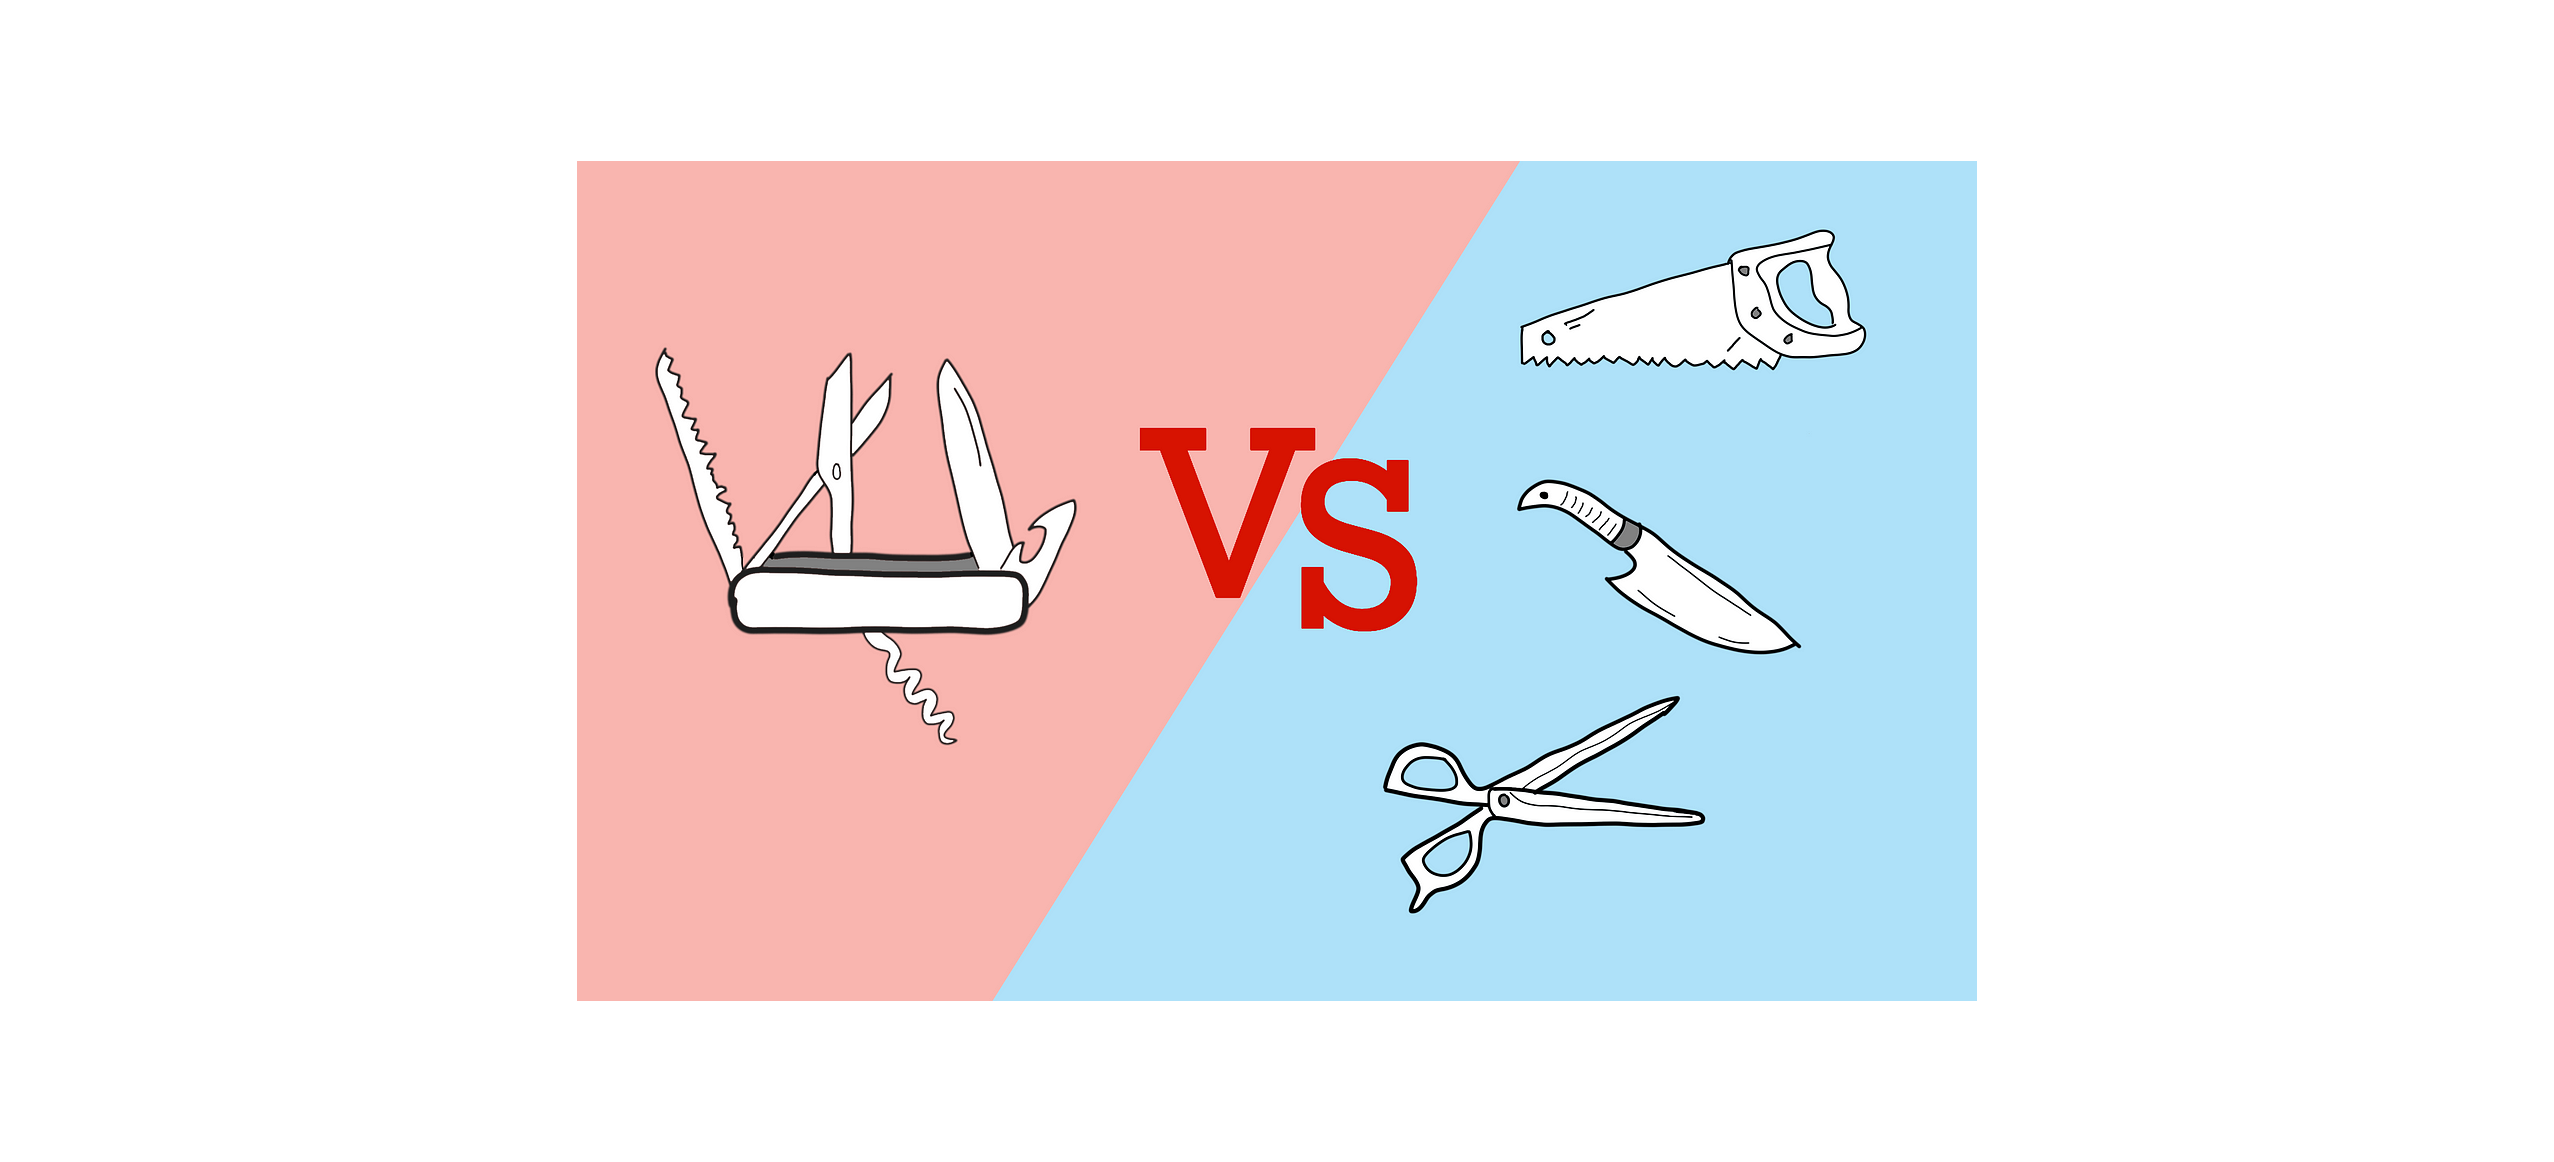

## `SRP` - The Single Responsibility Principle.

Ejemplo

In [1]:
# file_manager_srp.py

from pathlib import Path
from zipfile import ZipFile

class FileManager:
    def __init__(self, filename):
        self.path = Path(filename)

    def read(self, encoding="utf-8"):
        return self.path.read_text(encoding)

    def write(self, data, encoding="utf-8"):
        self.path.write_text(data, encoding)

    def compress(self):
        with ZipFile(self.path.with_suffix(".zip"), mode="w") as archive:
            archive.write(self.path)

    def decompress(self):
        with ZipFile(self.path.with_suffix(".zip"), mode="r") as archive:
            archive.extractall()

- `FileManager` tiene dos responsabilidades diferentes. 
    1. `.read()` y `.write()` para gestionar I/O de archivos. 
    2. También se encarga de los archivos ZIP al proporcionar con `.compress()` y `.decompress()`.

Esta clase infringe el `SRP` porque tiene dos motivos para cambiar su implementación interna.

## `SRP` - The Single Responsibility Principle.

Arreglemos esto

In [2]:
# file_manager_srp.py

from pathlib import Path
from zipfile import ZipFile

class FileManager:
    def __init__(self, filename):
        self.path = Path(filename)

    def read(self, encoding="utf-8"):
        return self.path.read_text(encoding)

    def write(self, data, encoding="utf-8"):
        self.path.write_text(data, encoding)
        
class ZipFileManager:
    def __init__(self, filename):
        self.path = Path(filename)

    def compress(self):
        with ZipFile(self.path.with_suffix(".zip"), mode="w") as archive:
            archive.write(self.path)

    def decompress(self):
        with ZipFile(self.path.with_suffix(".zip"), mode="r") as archive:
            archive.extractall()

- Ahora, se tienen dos clases más pequeñas, cada una con una sola responsabilidad.
    - La administración de un archivo es realizada por `FileManager`.
    - La compresión y descompresión de un archivo utilizando el formato *ZIP* es manejada por `ZipFileManager`.
- También son más fáciles de entender, probar y depurar.


## `SRP` - The Single Responsibility Principle.

- El concepto de responsabilidad  puede ser bastante subjetivo. 
- Tener una única responsabilidad no necesariamente implica tener un solo método. 
- La responsabilidad no está directamente relacionada con el número de métodos, sino con la tarea central de la que la clase es responsable, dependiendo de la idea de lo que representa la clase en tu código. 
- La subjetividad no es un impedimento por usar el *SRP*.

## `OCP` - Open-Closed Principle.

El principio abierto/cerrado (OCP) para el diseño orientado a objetos fue originalmente introducido por Bertrand Meyer en 1988 y significa que:

> Las entidades de software (clases, módulos, funciones, etc.) deben estar abiertas para la extensión, pero cerradas para la modificación.

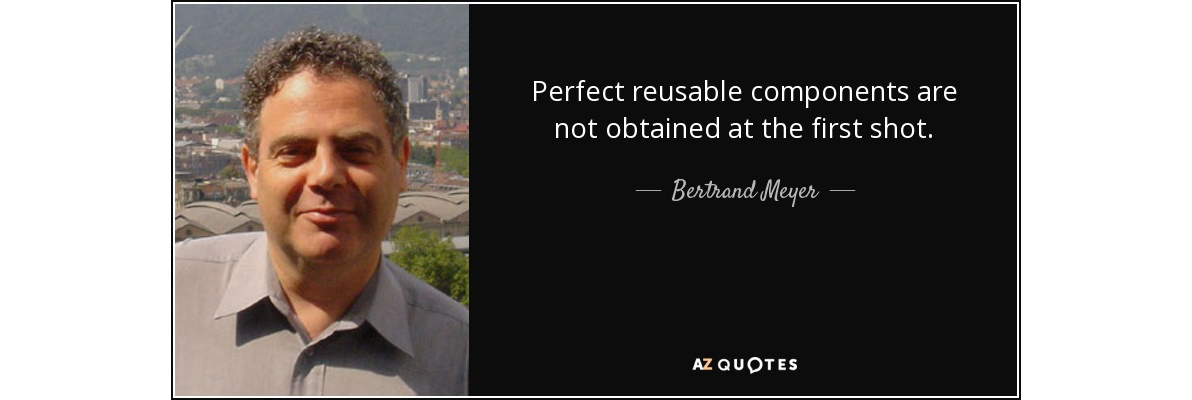

## `OCP` - Open-Closed Principle.

- *Módulo Abierto:* Si todavía está disponible para la extensión. Por ejemplo, debería ser posible agregar campos a las estructuras de datos que contiene o nuevos elementos al conjunto de funciones que realiza.
- *Módulo Cerrado:* Si está disponible para su uso por otros módulos. Esto asume que el módulo ha recibido una descripción bien definida y estable (la interfaz en el sentido de ocultamiento de la información).

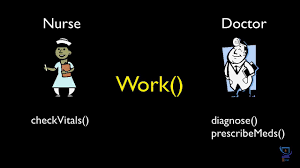

## `OCP` - Open-Closed Principle.

Ejemplo

In [3]:
# shapes_ocp.py

from math import pi

class Shape:
    def __init__(self, shape_type, **kwargs):
        self.shape_type = shape_type
        if self.shape_type == "rectangle":
            self.width = kwargs["width"]
            self.height = kwargs["height"]
        elif self.shape_type == "circle":
            self.radius = kwargs["radius"]

    def calculate_area(self):
        if self.shape_type == "rectangle":
            return self.width * self.height
        elif self.shape_type == "circle":
            return pi * self.radius ** 2

- Un argumento `shape_type` puede ser *rectangle* o *circle*. Además, un conjunto específico de argumentos de palabras clave es tomado utilizando la sintaxis `**kwargs`. 
- Si el tipo de forma es *rectangle*, los argumentos ancho (width) y alto (height) deben ser pasados para que un rectángulo adecuado pueda ser construido.
- Si la forma es *circle*, un argumento de radio (radius) debe ser pasado.
- También se dispone de un método `.calculate_area()` que funciona de acuerdo a su `.shape_type`.



## `OCP` - Open-Closed Principle.

Crítica al ejemplo

In [4]:
rectangle = Shape("rectangle", width=10, height=5)
circle = Shape("circle", radius=5)
circle.calculate_area(), rectangle.calculate_area()

(78.53981633974483, 50)

- La clase funcio crorrectamente, y puede crearse círculos y rectángulos, calcular sus áreas, y demás. Sin embargo, la clase parece bastante deficiente. Al primer vistazo, algo parece estar mal.

- Imaginen que se necesita agregar una nueva forma, tal vez un cuadrado. ¿Cómo se harías? Bueno, la opción aquí sería agregar otra cláusula `elif` a `.__init__()` y a `.calculate_area()` para poder satisfacer los requisitos de una forma cuadrada.

- Tener que realizar estos cambios para crear nuevas formas significa que la clase *está abierta a modificaciones*.


## `OCP` - Open-Closed Principle.

Solución

In [16]:
from abc import ABC, abstractmethod; from math import pi

class Shape(ABC):
    def __init__(self, shape_type):
        self.shape_type = shape_type

    @abstractmethod
    def calculate_area(self): ...

class Circle(Shape):
    def __init__(self, radius):
        super().__init__("circle")
        self.radius = radius

    def calculate_area(self):
        return pi * self.radius**2

class Rectangle(Shape):
    def __init__(self, width, height):
        super().__init__("rectangle")
        self.width = width
        self.height = height

    def calculate_area(self):
        return self.width * self.height

class Square(Shape):
    def __init__(self, side):
        super().__init__("square")
        self.side = side

    def calculate_area(self):
        return self.side**2

- Esta actualización cierra la clase a modificaciones. 
- Ahora se puede agregar nuevas formas aimplementando la interfaz requerida, lo que también hace que estas clases sean polimórficas.



## `LSP` - Liskov Substitution Principle.

- Fue introducido por [Barbara Liskov](https://en.wikipedia.org/wiki/Barbara_Liskov) en una conferencia de [OOPSLA](https://dl.acm.org/doi/epdf/10.1145/62138.62141) en 1987. 
- Ese principio ha sido una parte fundamental de la programación orientada a objetos. El principio establece que:

> Los subtipos deben ser sustituibles por sus tipos base.
>
> **Versión moderna:** Un programa que utiliza una interfaz no debe confundirse por una implementación de esa interfaz.

- Un fragmento de código que funciona con una clase `Shape`, entonces debería poderse sustituir esa clase por cualquiera de sus subclases, como `Circle` o `Rectangle`.

- Es necesario que los métodos en la super clase tengan los mismos comportamientos en la subclase.

- Esta [entrevista a Barbara Liskov](https://www.youtube.com/watch?v=-Z-17h3jG0A) son cuatro minutos super bien gastados.



## `LSP` - Liskov Substitution Principle.

En la práctica:

Es de hacer que tus subclases se comporten como sus clases base sin romper las expectativas de nadie cuando llaman a los **mismos** métodos. 

In [6]:
class Rectangle:
    def __init__(self, width, height):
        self.width = width
        self.height = height

    def calculate_area(self):
        return self.width * self.height
    
class Square(Rectangle):
    def __init__(self, side):
        super().__init__(side, side)

    def __setattr__(self, key, value):
        super().__setattr__(key, value)
        if key in ("width", "height"):
            self.__dict__["width"] = value
            self.__dict__["height"] = value

- `Square` es-un `Rectangle`, y el constructor de la clase toma únicamente el lado del cuadrado como argumento. - Internamente, el método `.__init__()` inicializa los atributos del padre, `.width` y `.height`, con el argumento del lado.

- `.__setattr__()` intercepta la asignación de `.width` o `.height`, y cuando se establece uno de esos atributos, el otro también se establece en el mismo valor.


## `LSP` - Liskov Substitution Principle.

In [7]:
square = Square(5)
print(vars(square))
{'width': 5, 'height': 5}

square.width = 7
print(vars(square))

square.height = 9
print(vars(square))

{'width': 5, 'height': 5}
{'width': 7, 'height': 7}
{'width': 9, 'height': 9}


- Cuando se espera un objeto de tipo rectángulo, podría suponer que se comportará como tal al exponer dos atributos independientes `.width` y `.height`. 
- `Square` rompe esa suposición al cambiar el comportamiento prometido por la interfaz del objeto. 
- Esto podría tener consecuencias sorprendentes e indeseadas, que probablemente serían difíciles de depurar.

- Aunque un cuadrado es un tipo específico de rectángulo en matemáticas, las clases que representan esas formas no deberían estar en una relación de padre e hijo si deseas que cumplan con el *LSP*.

## `LSP` - Liskov Substitution Principle

Solución

In [8]:
class Shape(ABC):
    @abstractmethod
    def calculate_area(self):
        pass

class Rectangle(Shape):
    def __init__(self, width, height):
        self.width, self.height = width, height

    def calculate_area(self):
        return self.width * self.height

class Square(Shape):
    def __init__(self, side):
        self.side = side

    def calculate_area(self):
        return self.side ** 2

- `Shape` puede sustituir a través del polimorfismo tanto con `Rectangle` como con `Square`.
- Ambos tipos de formas concretas tienen conjuntos distintos de atributos, diferentes métodos de inicialización y podrían potencialmente implementar aún más comportamientos separados. Lo único que tienen en común es la capacidad de calcular su área.

- Con esta implementación en su lugar, se puedes usar el tipo `Shape` de manera intercambiable con sus subtipos **cuando solo importa su comportamiento común**.


## `LSP` - Liskov Substitution Principle

In [9]:
def get_total_area(shapes):
    return sum(shape.calculate_area() for shape in shapes)

get_total_area([Rectangle(10, 5), Square(5)])

75

- Por polimorfismo se puede pasar una coleccion formada por un rectángulo y un cuadrado a una función que calcula el área total. 
- La función solo se preocupa por el método `.calculate_area()`, no importa que las formas sean diferentes. 
- Esto es la esencia del *LSP*.

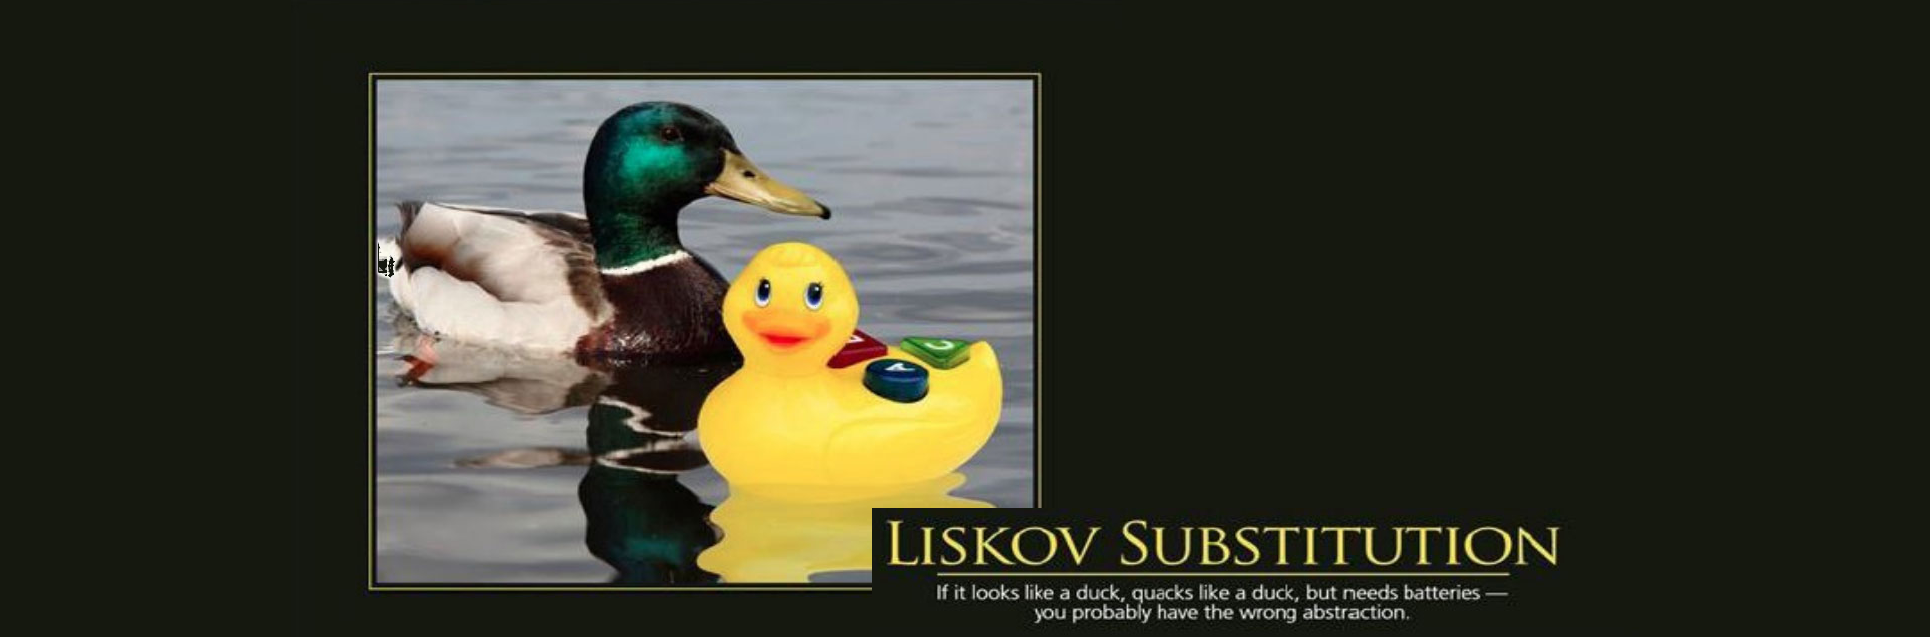


## `ISP` - Interface Segregation Principle

Es otro logro del Tío Bob. La idea principal del principio es que:

> Los clientes no deben verse obligados a depender de métodos que no utilizan. Las interfaces pertenecen a los clientes, no a jerarquías.

> **Versión moderna:** Mantén las interfaces pequeñas para que los usuarios no terminen dependiendo de cosas que no necesitan.


- En este caso, los clientes son clases y subclases, y las interfaces consisten en métodos y atributos. 
- En otras palabras, si una clase no utiliza métodos o atributos particulares, esos métodos y atributos deben segregarse en clases más específicas.

## `ISP` - Interface Segregation Principle

Ejemplo

In [10]:
class Printer(ABC):
    @abstractmethod
    def print(self, document): ...

    @abstractmethod
    def scan(self, document): ...

class OldPrinter(Printer):
    def print(self, document):
        print(f"Printing {document} in black and white...")

    def scan(self, document):
        raise NotImplementedError("Scan functionality not supported")

class ModernPrinter(Printer):
    def print(self, document):
        print(f"Printing {document} in color...")

    def scan(self, document):
        print(f"Scanning {document}...")

- `Printer`, proporciona la interfaz que sus subclases deben implementar. 
- `OldPrinter` es-un `Printer` y debe implementar la misma interfaz. 
- `OldPrinter` no utiliza el método `.scan()` porque este tipo de impresora no admite esta funcionalid.

Esta implementación viola el *ISP* porque obliga a `OldPrinter` a exponer una interfaz que la clase no  necesita. 

## `ISP` - Interface Segregation Principle

Solución

In [11]:
class Printer(ABC):
    @abstractmethod
    def print(self, document): ...

class Scanner(ABC):
    @abstractmethod
    def scan(self, document): ...

class OldPrinter(Printer):
    def print(self, document): print(f"Printing {document} in black and white...")

class NewPrinter(Printer, Scanner):
    def print(self, document): print(f"Printing {document} in color...")
    def scan(self, document): print(f"Scanning {document}...")

- `Printer` y `Scanner` son clases base que proporcionan interfaces específicas con una única responsabilidad cada una. 
- `OldPrinter`, solo hereda de `Printer`. La clase no tiene métodos no utilizados. 
- `ModernPrinter`, implementa ambas interfaces.

**Se ha ha segregado la interfaz de Printer.**

Este diseño permite crear "máquinas" diferentes con diferentes conjuntos de funcionalidades, lo que lo hace q más flexible y extensible.


## DIP - Dependency Inversion Principle

> Las abstracciones no deben depender de los detalles. Los detalles deben depender de las abstracciones.
>
> **Versión Moderna:** Depender en el sentido de la abstracción. Los módulos de alto nivel no deben depender de detalles de bajo nivel.

- Es bastante complejo de entender sin un ejemplo.  

## DIP - Dependency Inversion Principle

- Supongamos que se está construyendo una aplicación y tienes una clase `FrontEnd` para mostrar datos a los usuarios de manera amigable. 
- La aplicación obtiene sus datos de una base de datos, por lo cual:


In [12]:
class FrontEnd:
    def __init__(self, back_end):
        self.back_end = back_end

    def display_data(self):
        data = self.back_end.get_data_from_database()
        print("Display data:", data)

class BackEnd:
    def get_data_from_database(self):
        return "Data from the database"

- La clase `FrontEnd` depende de la clase `BackEnd` y de su implementación concreta (están estrechamente acopladas). 
- Este acoplamiento puede llevar a problemas de escalabilidad. Por ejemplo, supongamos que tu aplicación está creciendo rápidamente y deseas que la aplicación pueda leer datos de un servicio.

- Podria agregarse  un nuevo método a `BackEnd` pero *OCP*


## DIP - Dependency Inversion Principle

Solución


In [13]:
class FrontEnd:
    def __init__(self, data_source):
        self.data_source = data_source

    def display_data(self):
        data = self.data_source.get_data()
        print("Display data:", data)

class DataSource(ABC):
    @abstractmethod
    def get_data(self): ...

class Database(DataSource):
    def get_data(self):
        return "Data from the database"

class API(DataSource):
    def get_data(self):
        return "Data from the API"

- `DataSource` es una abstracción que proporciona la interfaz requerida.
- `FrontEnd` ahora depende de la interfaz proporcionada por `DataSource`, que es una *abstracción*.
- Las clases `Database` y `API` son implementaciones de esta interfaz.

## DIP - Dependency Inversion Principle

Solución - Uso

In [15]:
db_front_end = FrontEnd(Database())
api_front_end = FrontEnd(API())

api_front_end.display_data(), db_front_end.display_data();

Display data: Data from the API
Display data: Data from the database


## Seguir las reglas en la lata de pintura no te enseñará a pintar.

- Los principios no convertirán a un mal programador en un buen programador. 
- Los principios deben aplicarse con juicio. Si se aplican de manera mecánica, es igual de perjudicial que no aplicarlos en absoluto.

> Si deseas pintar bien, *te sugiero que aprendas las reglas de la lata de pintura*. 

- Puede que no se esté de acuerdo con todas ellas, Pero es mejor que las conozcerlas. 
- El conocimiento de los principios y patrones brinda la justificación para decidir cuándo y dónde aplicarlos. 
- De lo contrario las decisiones son mucho más arbitrarias.

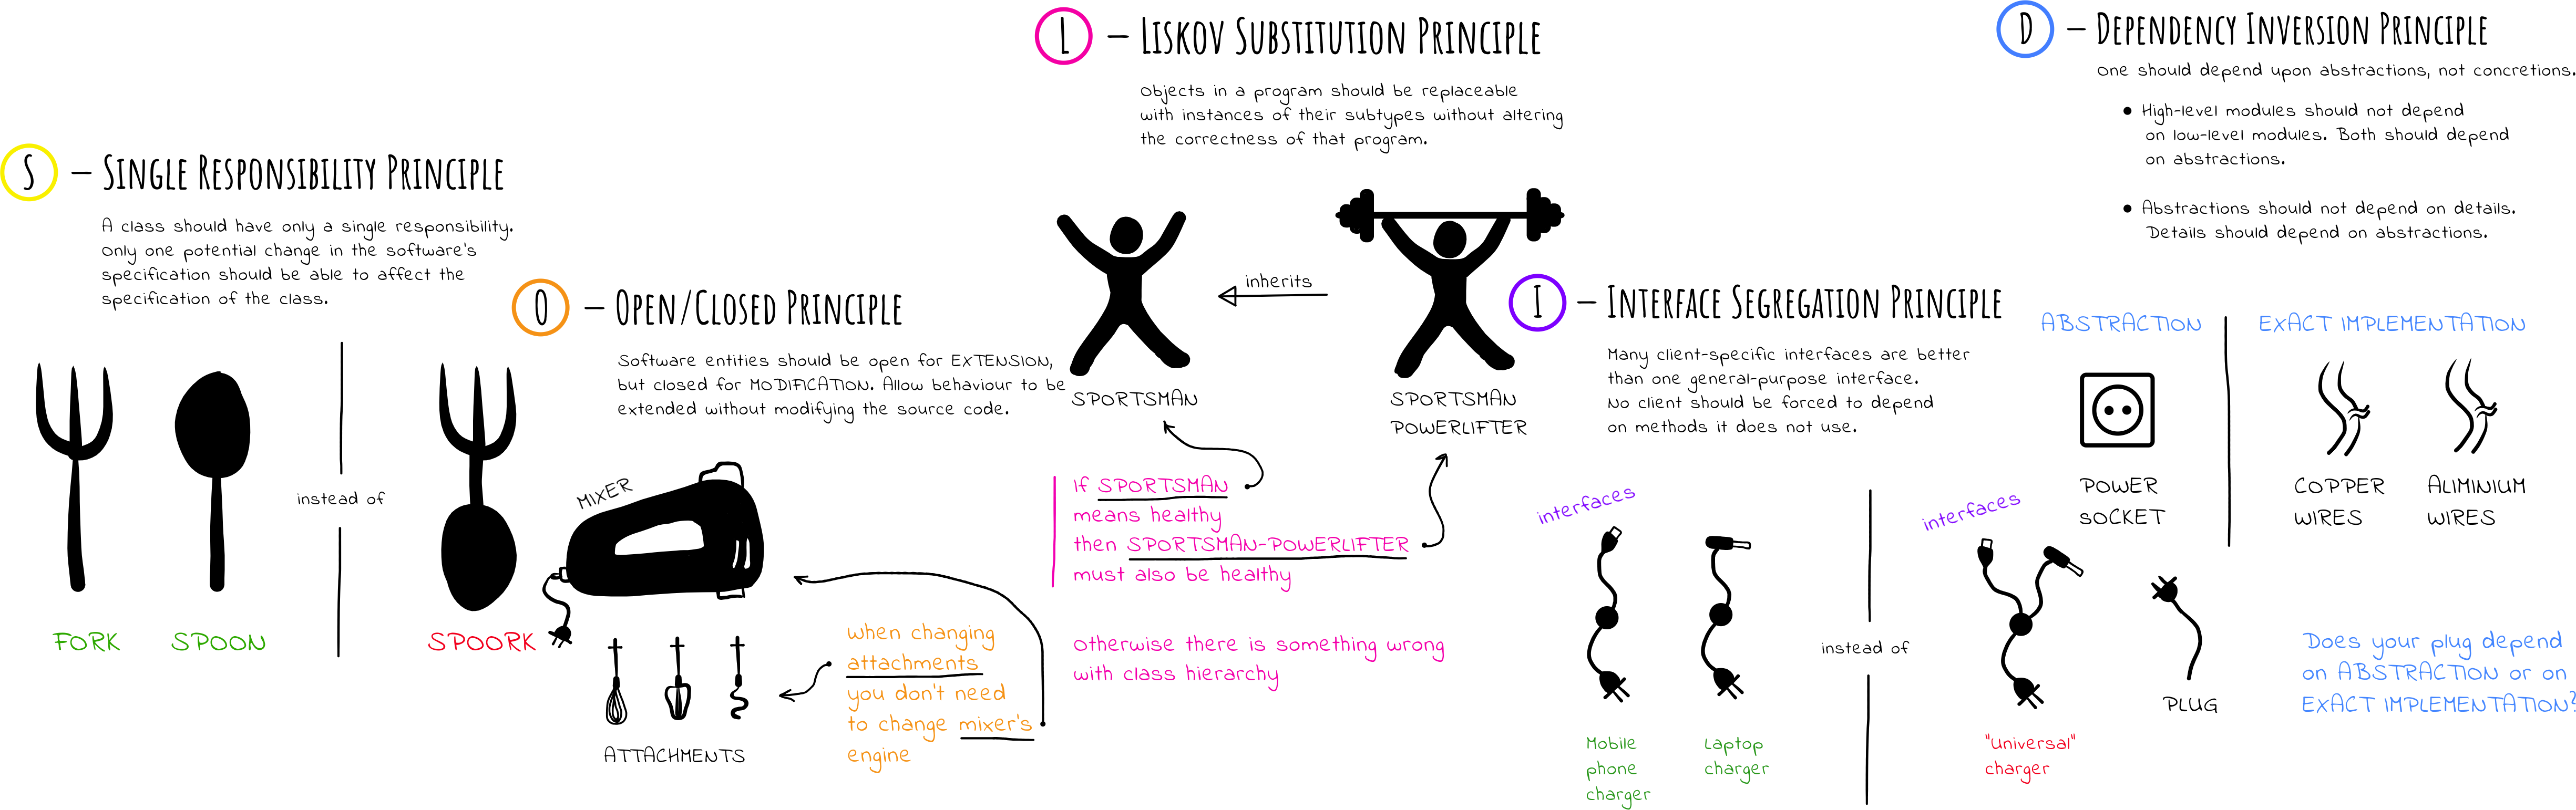

https://itnext.io/solid-principles-sketches-a38865e771f0